
# Project: Investigate a Dataset (TMDB Movie Data Investigation!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this investigation, i've considered TMDB movie dataset which orginally sourced from Kaggle. This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I've analysed the dataset from the following questions perspective. The core of this analysis to find out how different parameters contribute for the success of a movie. Though there are several ways to define the success of a movie, in this analysis i've considered profit as the base to define the success of a movie. 
 

 **1)** What are the top & least 100 successful movies
 <br> **2)** How budget, revenue and profit vary across different years
 <br> **3)** How popularity varies across different years
 <br> **4)** How vote count varies across different years
 <br> **5)** How runtime varies across different years
 <br> **6)** How popularity is associated with succes of the movies
 <br> **7)** How runtime is associated with success of the movies
 <br> **8)** How vote count is associated with success of the movies
 <br> **9)** How release day is associated with success of the movies
 <br> **10)** How release month is associated with success of the movies
 
The first five questions are used to analyse the top 100 successful movies and how different variables vary across different years. Later, the next five qustions are used to analyse how different variables are associated with success of the movies. 

I've calculated the profit by deducting budget from revenue and used profit for further analysis

As its difficult to analyse impact of different variables on the success/profit all the movies individually, i've created a funtion which can devide the whole set of dataset into four different quntiles of profit which are used as the base for our analysis to know the impact of different variables on those groups/levels of data. 


In [76]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

## Import of libraries
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [77]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Loading & reading the file and printing few rows of the dataframe
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Total number of rows & colums**

In [78]:
# Number of rows & columns of dataframe
movie_data.shape

(10866, 21)

**Total number of unique rows**

In [79]:
# Printing number of rows
print(len(movie_data['id'].unique()))

10865


**Print duplicate rows**

In [80]:
# Printing duplcate rows 
movie_data.id.duplicated().sum()
pd.concat(g for _, g in movie_data.groupby("id") if len(g) > 1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**Total null values in each column**

In [81]:
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Total zero values in each column**

In [82]:
(movie_data == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

**Data types of each column**

In [83]:
movie_data.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Descriptive statistics before cleansing**

In [84]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

**As a part of data cleaning, We performed following things**
        <br> **1)** Removed duplicated row 
        <br> **2)** Removed extra columns that are not required for analysis
        <br> **3)** Changed data types of revenue & budget for the sake of format and processing 
        <br> **4)** Changed date format of release date
        <br> **5)** Inserted new columns "Release day" and "Release month" for data exploring

**Removing duplicate records**

In [85]:
#Keeping the first one of duplicate columns and removing the second one
movie_data.drop_duplicates(keep = 'first', inplace = True)
movie_data.shape

(10865, 21)

**Removing unused columns**

In [86]:
#Follwing columns are being removed as we are not considering them for analysis
movie_data.drop(['imdb_id','homepage',
                 'tagline','keywords',
                 'overview','vote_average',
                 'budget_adj','revenue_adj'], axis=1, inplace= True, errors = 'ignore')

#print sample data
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


**Conversion of float values to int**

In [87]:
int_type=['budget', 'revenue']
#changing data type
movie_data[int_type]=movie_data[int_type].astype(np.int64)
#printing the changed information
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


**Print Data types after conversion**

In [88]:
#Confirming if data types of revenue & budget got modified
movie_data.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
release_year              int64
dtype: object

**Removing rows with null & zero values**

In [89]:
#Removing null values of categorical columns
movie_data.dropna(subset=['director','cast','genres'], inplace = True)
movie_data.shape

(10731, 13)

In [90]:
#Removing zero values from runtime as it will not impact the process
#Zero values from budget & revenue columns are not considered as it will impact the analysis 
#with the loss of around to 60% of sample data, so we kept those columns
movie_data.query('runtime != 0', inplace=True)
movie_data.shape

(10703, 13)

**Conversion of release date format**

In [91]:
#Release data format change to universal format for easy access of day,month and year
movie_data.release_date = pd.to_datetime(movie_data['release_date'])
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


**Including columns for day and month of release date**

In [92]:
#New columns release month & release date insered 
movie_data['release_month'] = movie_data['release_date'].dt.strftime('%b')
movie_data['release_day'] = movie_data['release_date'].dt.strftime('%A')
#print sample data
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Jun,Tuesday
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,May,Wednesday
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,Mar,Wednesday
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,Dec,Tuesday
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,Apr,Wednesday


**Replacing zero with NaN in all rows**

In [93]:
#Including budget and revenue columns,zero values are replaced with null
movie_data = movie_data.replace(0, np.NAN)
movie_data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Jun,Tuesday
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,May,Wednesday
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,Mar,Wednesday
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,Dec,Tuesday
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,Apr,Wednesday


**Descriptive statistics after cleansing**

In [94]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Research Question 1 (What are the top & least 100 successful movies!)

**Profit of each film of dataset**

In [95]:
movie_data.insert(4,'profit',movie_data['revenue']-movie_data['budget'])
#previewing the changes in the dataset
movie_data.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Jun,Tuesday
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,May,Wednesday
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,Mar,Wednesday
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,Dec,Tuesday
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,Apr,Wednesday


**Top 100 successful movies**

In [96]:
#Top 100 films profit wise
movie_data.nlargest(100, 'profit')

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day
1386,19995,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,2009,Dec,Thursday
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,Dec,Tuesday
5231,597,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,1997,Nov,Tuesday
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Jun,Tuesday
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,Apr,Wednesday
4361,24428,7.637767,220000000.0,1.519558e+09,1.299558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,2012,Apr,Wednesday
3374,12445,5.711315,125000000.0,1.327818e+09,1.202818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,2011,Jul,Thursday
14,99861,5.944927,280000000.0,1.405036e+09,1.125036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,2015,Apr,Wednesday
5422,109445,6.112766,150000000.0,1.274219e+09,1.124219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,2013,Nov,Wednesday
8094,1642,1.136610,22000000.0,1.106280e+09,1.084280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,1995,Jul,Friday


** Least 100 successful movies**

In [97]:
#Least 100 films profit wise 
movie_data.nsmallest(100, 'profit')

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day
2244,46528,0.250540,425000000.0,11087569.0,-413912431.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,2010,Dec,Thursday
5508,57201,1.214510,255000000.0,89289910.0,-165710090.0,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,2013,Jul,Wednesday
7031,10733,0.948560,145000000.0,25819961.0,-119180039.0,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,2004,Apr,Wednesday
3484,50321,0.921653,150000000.0,38992758.0,-111007242.0,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,2011,Mar,Wednesday
4970,10009,1.653031,100000000.0,250.0,-99999750.0,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,2003,Oct,Monday
2435,1911,1.189386,160000000.0,61698899.0,-98301101.0,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275,1999,Aug,Friday
4078,11692,0.912373,100000000.0,7103973.0,-92896027.0,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,75,2002,Aug,Thursday
6707,9986,0.536631,85000000.0,144.0,-84999856.0,Charlotte's Web,Julia Roberts|Steve Buscemi|John Cleese|Oprah ...,Gary Winick,97,Comedy|Family|Fantasy,Paramount Pictures|Kerner Entertainment Company,2006-12-15,161,2006,Dec,Friday
6590,11619,1.390297,149000000.0,64459316.0,-84540684.0,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,David Bowers|Sam Fell,85,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,2006-10-22,488,2006,Oct,Sunday
2915,6972,1.468543,130000000.0,49554002.0,-80445998.0,Australia,Nicole Kidman|Hugh Jackman|Essie Davis|David W...,Baz Luhrmann,165,Drama,Bazmark Films|Ingenious Film Partners|Twentiet...,2008-11-18,411,2008,Nov,Tuesday


**Top 100 successful movies year wise**

In [98]:
# Top 50 films profit wise for each year
movie_top = movie_data.groupby('release_year')['profit'].nlargest(100)
# print sample
movie_top.head(10) 

release_year       
1960          10143     48000000.0
              10141     31193052.0
              10144     22000000.0
              10170      4100000.0
              10142      2905000.0
1961          10110    211880014.0
              10112     37656822.0
              10113     22900000.0
              10121      9446352.0
              10111      7000000.0
Name: profit, dtype: float64

**Least 100 successful movies year wise**

In [99]:
# Least 50 films profit wise for each year
movie_least = movie_data.groupby("release_year")['profit'].nsmallest(50)
movie_least.head(10) 

release_year       
1960          10142     2905000.0
              10170     4100000.0
              10144    22000000.0
              10141    31193052.0
              10143    48000000.0
1961          10130    -1700000.0
              10131     1000000.0
              10124     1800000.0
              10134     2100000.0
              10111     7000000.0
Name: profit, dtype: float64

### Research Question 2 (How budget, revenue and profit vary across different years!)

In [100]:
#Mean of different variables as per release year
mean_budget = movie_data.groupby('release_year').mean()['budget']
mean_revenue  = movie_data.groupby('release_year').mean()['revenue']
mean_profit = movie_data.groupby('release_year').mean()['profit']
mean_pop = movie_data.groupby('release_year').mean()['popularity']
mean_votes = movie_data.groupby('release_year').mean()['vote_count']
mean_runtime = movie_data.groupby('release_year').mean()['runtime']

In [101]:
# build the index location for x-axis
index_budget = mean_budget.index
index_revenue = mean_revenue.index
index_profit = mean_profit.index

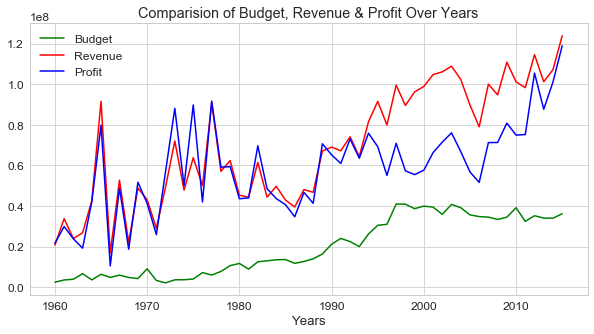

In [102]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
x1, y1 = index_budget, mean_budget
x2, y2 = index_revenue, mean_revenue
x3, y3 = index_profit, mean_profit
#set size
plt.figure(figsize=(10, 5))
#plot line chart for mean 
plt.plot(x1, y1, color = 'g', label = 'Budget')
plt.plot(x2, y2, color = 'r', label = 'Revenue')
plt.plot(x3, y3, color = 'b', label = 'Profit')
#set title and labels
plt.title('Comparision of Budget, Revenue & Profit Over Years')
plt.xlabel('Years')
#set legend
plt.legend(loc='upper left')

**As per above plot, we can see that movies from 1970 to 1980 may have more null values (non-availability of data) which caused profit line to surpass revenue line**

### Research Question 3 (How popularity varies across different years!)

In [103]:
# build the index location for x-axis
index_pop = mean_pop.index
index_votes = mean_votes.index
index_runtime = mean_runtime.index

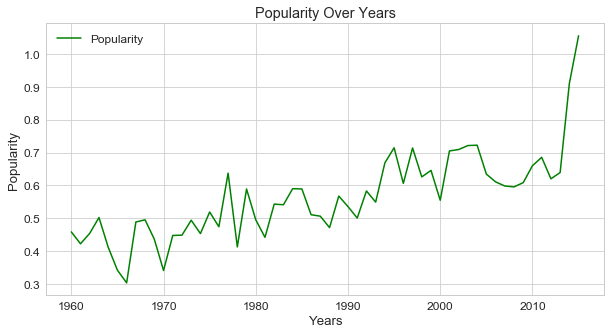

In [104]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
x, y = index_pop, mean_pop
#set size
plt.figure(figsize=(10, 5))
#plot line chart for mean 
plt.plot(x, y, color = 'g', label = 'Popularity')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Years')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

**As per above plot, we can see that popularity has continuous fluctuations until 2010 and then there is steep increase post 2010**

### Research Question 4 (How vote count varies across different years!)

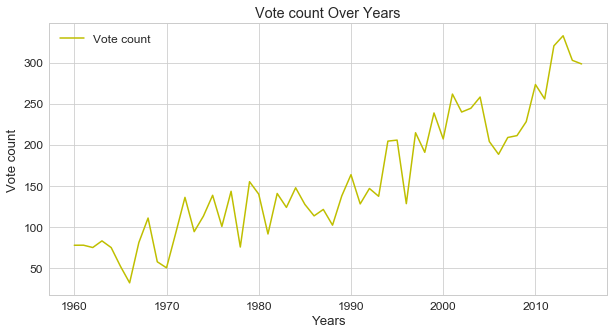

In [105]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
x, y = index_votes, mean_votes
#set size
plt.figure(figsize=(10, 5))
#plot line chart for mean 
plt.plot(x, y, color = 'y', label = 'Vote count')
#set title and labels
plt.title('Vote count Over Years')
plt.xlabel('Years')
plt.ylabel('Vote count');
#set legend
plt.legend(loc='upper left')

**As per above plot, we can see that vote count also gradualy increased across different years with fluctuations**

### Research Question 5 (How runtime varies across different years!)

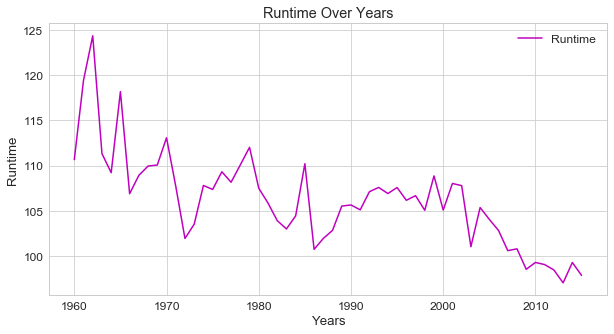

In [107]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
x, y = index_runtime, mean_runtime
#set size
plt.figure(figsize=(10, 5))
#plot line chart for mean 
plt.plot(x, y, color = 'm', label = 'Runtime')
#set title and labels
plt.title('Runtime Over Years')
plt.xlabel('Years')
plt.ylabel('Runtime');
#set legend
plt.legend(loc='upper right')

**As per above plot, run time has decreased over years**

### Research Question 6 (How popularity is associated with succes of the movies!)

In [108]:
def create_quantiles(df ,column):
# find quartile, max and min values
    min_value = df[column].min()
    first_quantile = df[column].describe()[4]
    second_quantile = df[column].describe()[5]
    third_quantile = df[column].describe()[6]
    max_value = df[column].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four profit level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates profit_levels column
    name = '{}_levels'.format(column)
    df[name] = pd.cut(df[column], bin_edges, labels=bin_names, include_lowest = True)
    return df

In [109]:
# using create_quantiles function to create profit level column
movie_data = create_quantiles(movie_data,'profit')
movie_data.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,release_month,release_day,profit_levels
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,Jun,Tuesday,High
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,May,Wednesday,High
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,Mar,Wednesday,High
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,Dec,Tuesday,High
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,Apr,Wednesday,High


In [110]:
#Mean of different variables as per the profit levels
pop_mean = movie_data.groupby('profit_levels')['popularity'].mean()
rtime_mean = movie_data.groupby('profit_levels')['runtime'].mean()
vcount_mean = movie_data.groupby('profit_levels')['vote_count'].mean()

In [111]:
# the x locations for the groups
pop_ind = np.arange(len(pop_mean))  
rtime_ind = np.arange(len(rtime_mean)) 
vcount_ind = np.arange(len(vcount_mean)) 
# the width of the bars
width = 0.5 

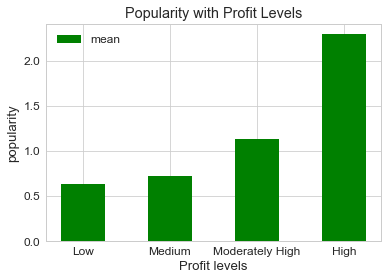

In [112]:
#set style
sns.set_style('whitegrid')
#set context
sns.set_context("paper" ,font_scale=1.5, rc={"lines.linewidth": 1.5})
#plot bars
bars = plt.bar(pop_ind, pop_mean, width, color='g', alpha=1.0, label='mean')
# title and labels
plt.ylabel('popularity')
plt.xlabel('Profit levels')
plt.title('Popularity with Profit Levels')
locations = pop_ind  
labels = pop_mean.index  
plt.xticks(locations, labels)
# legend
plt.legend()

**As per the above plot, popularity is directly proportional to profits of the movies**

### Research Question 7 (How runtime is associated with success of the movies!)

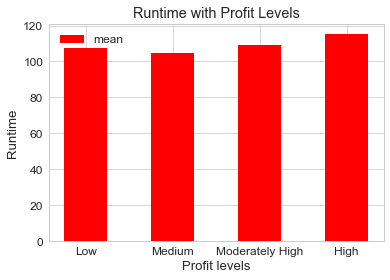

In [113]:
#set style
sns.set_style('whitegrid')
#set context
sns.set_context("paper" ,font_scale=1.5, rc={"lines.linewidth": 1.5})
#plot bars
bars = plt.bar(rtime_ind, rtime_mean, width, color='r', alpha=1.0, label='mean')
# title and labels
plt.ylabel('Runtime')
plt.xlabel('Profit levels')
plt.title('Runtime with Profit Levels')
locations = rtime_ind 
labels = rtime_mean.index  
plt.xticks(locations, labels)
# legend
plt.legend(loc ="upper left")

**As per the above plot, there is slight impact of runtime on profit levels of the movies, runtime is slightly more for high profit level movies than the movies which belong to other groups of profit levels**

### Research Question 8 (How vote count is associated with success of the movies!)

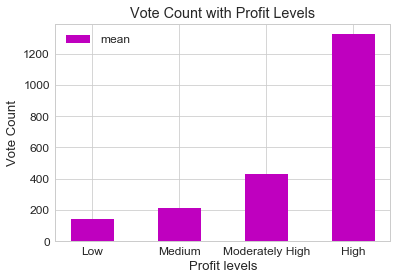

In [114]:
#set style
sns.set_style('whitegrid')
#set context
sns.set_context("paper" ,font_scale=1.5, rc={"lines.linewidth": 1.5})
#plot bars
bars = plt.bar(vcount_ind, vcount_mean, width, color='m', alpha=1.0, label='mean')
# title and labels
plt.ylabel('Vote Count')
plt.xlabel('Profit levels')
plt.title('Vote Count with Profit Levels')
locations = vcount_ind  # xtick locations，345...
labels = vcount_mean.index  
plt.xticks(locations, labels)
# legend
plt.legend()

**As per the above plot, vote count is directly proportional to profits of the movies, there is significant difference between vote counts of high profit level movies and other profit level groups of movies **

### Research Question 9 (How release day is associated with success of the movies!)

Text(0,0.5,'Profit levels')

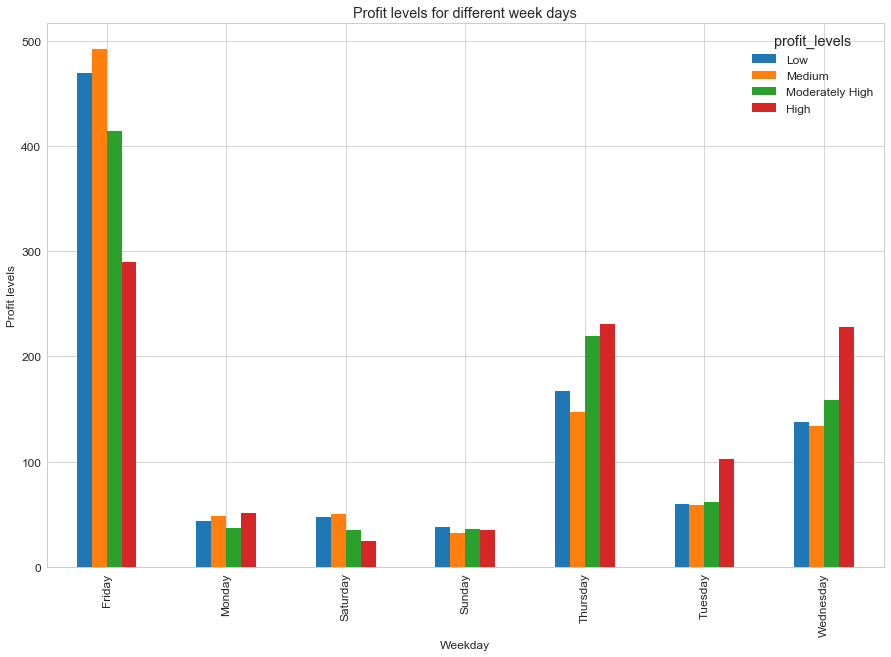

In [115]:
df2 = movie_data.groupby(["release_day", "profit_levels"]).size().reset_index(name='Count')
#Creating pivot table for profit levels of each weekday
df3 = pd.pivot_table(df2,  values='Count',  columns=['profit_levels'],  index = "release_day",
                         aggfunc=np.sum,  fill_value=0)
# Plot bars 
ax = df3.plot(kind='bar', title ="Profit levels for different week days",figsize=(15,10),legend=True, fontsize=12)
# Lables and size
ax.set_xlabel("Weekday",fontsize=12)
ax.set_ylabel("Profit levels",fontsize=12)

**As per the above plot,profit levels are more for the movies which are released on Friday than any other day**

### Research Question 10 (How release month is associated with success of the movies!)

Text(0,0.5,'Profit levels')

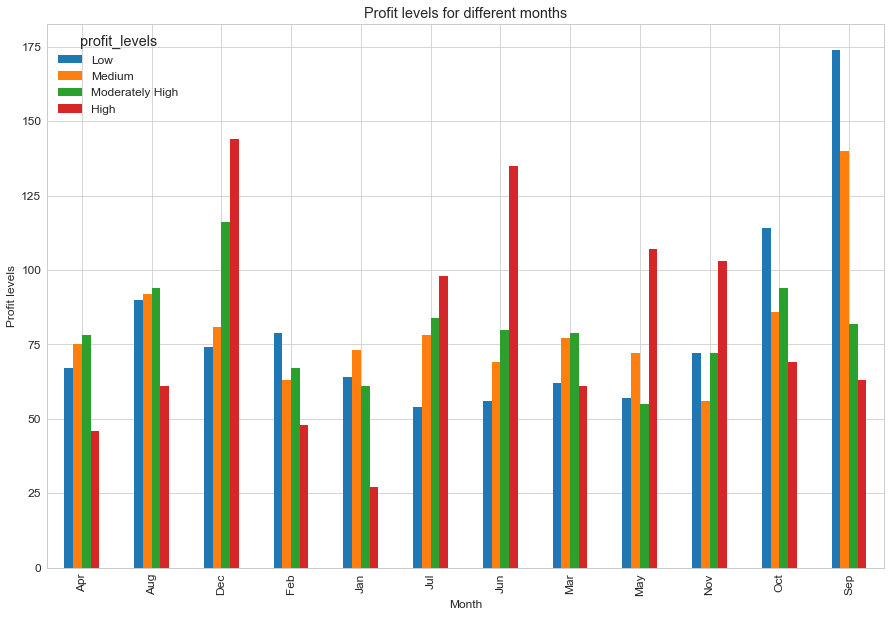

In [116]:
df4 = movie_data.groupby(["release_month", "profit_levels"]).size().reset_index(name='Count')
#Creating pivot table for profit levels of each month
df5 = pd.pivot_table(df4,  values='Count',  columns=['profit_levels'],  index = "release_month",
                         aggfunc=np.sum,  fill_value=0)
# Plot bars
ax = df5.plot(kind='bar', title ="Profit levels for different months",figsize=(15,10),legend=True, fontsize=12)
# Lables and size
ax.set_xlabel("Month",fontsize=12)
ax.set_ylabel("Profit levels",fontsize=12)


**As per above plot, high profit level movies are more in December and May, June in which christmas festival and summer season falls respectively** 

**Correlation between profit & Popularity **

In [117]:
#movie_data['popularity'].corr(movie_data['profit'])
movie_data['profit'].corr(movie_data['popularity'])

0.5960802044338918

**Correlation between profit & vote count**

In [118]:
movie_data['profit'].corr(movie_data['vote_count'])

0.7282758312237962

**Correlation between profit & runtime**

In [119]:
movie_data['profit'].corr(movie_data['runtime'])

0.22059705250729103

<a id='conclusions'></a>
## Conclusions


**1)** The dataset has been analysed, cleaned by removing unnecessary data and including necessary data for exploration and analysis process
<br> **2)** Along with the exploration of trend of variables like popularity,runtime and vote count across different years, the core of the analysis is mainly concentrated on the impact/association of different variables on profit levels to know what are the factors that contribute to the success of a movie (gain more profit) and what are the factors that contribute to the features of a successful movie 
<br> **3)** The findings from each plot is mentioned below respective plot,though there are correlations between profit levels and other variables including popularity, vote count, release day and release month, we can't imply that these variables are the causation reasons for that as the results are tentative, in other words we can't imply correlation causes causation as this analysis didn't consider hidden variables  

### Limitations
**1)** As more than 50% of data has zero values for budget and revenue columns, the analysis on success of the films based on profit may not represent the population properly as sample size is not significantly reduced
<br> **2)** There are few outliers in columns which might have distored the analysis
<br> **3)** There can be other factors, as well, which contribute for the sucess of the films like directors,production companies and generes which we didn't include our analysis
<br> **4)** There might be other paramters which are not included in the dataset that contribute for the success of the films 
